In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
students_data = pd.read_csv("/content/StudentsPerformance.csv")


students_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [24]:
students_data.shape

(1000, 8)

In [25]:
students_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
students_data.groupby("parental level of education")["math score"].mean().sort_values(ascending=False)

,math score
parental level of education,
master's degree,69.745763
bachelor's degree,69.389831
associate's degree,67.882883
some college,67.128319
some high school,63.497207
high school,62.137755


In [28]:
students_data.groupby("gender")[["reading score","writing score", "math score"]].mean()

,reading score,writing score,math score
gender,,,
female,72.608108,72.467181,63.633205
male,65.473029,63.311203,68.728216


In [29]:
students_data['total_score'] = students_data[["reading score","writing score", "math score"]].sum(axis=1)


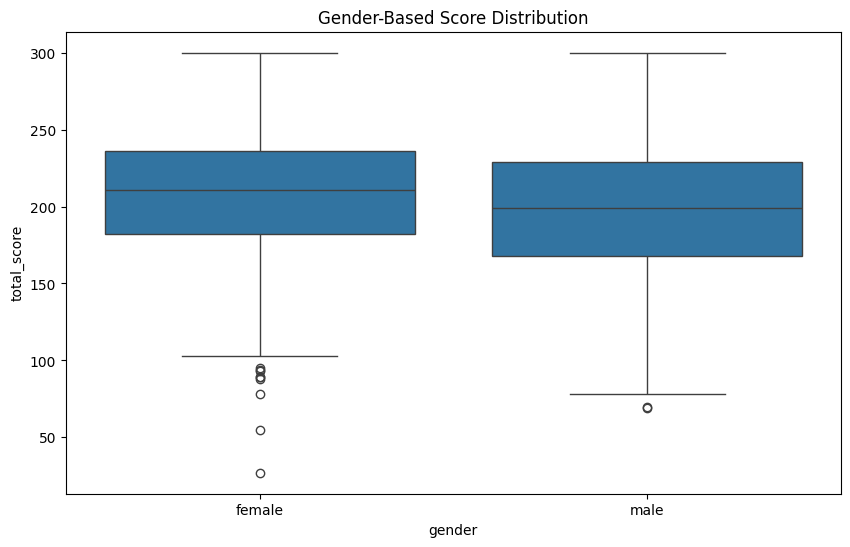

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=students_data, x='gender', y='total_score')
plt.title("Gender-Based Score Distribution")
plt.show()


In [31]:
students_data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [32]:
threshold = students_data['total_score'].quantile(0.90)
top_10 = students_data[students_data['total_score'] >= threshold]

top_10.groupby(['gender', 'lunch', 'test preparation course']).size().sort_values(ascending=False)

gender  lunch         test preparation course
female  standard      none                       31
                      completed                  29
male    standard      completed                  20
                      none                        9
female  free/reduced  completed                   6
male    free/reduced  completed                   3
female  free/reduced  none                        2
male    free/reduced  none                        2
dtype: int64

In [33]:
students_data.groupby(['race/ethnicity', 'lunch'])[['math score', 'reading score', 'writing score']].mean()

math score  reading score  writing score
race/ethnicity lunch                                                 
group A        free/reduced   55.222222      60.555556      57.194444
               standard       65.981132      67.471698      66.396226
group B        free/reduced   57.434783      63.971014      61.521739
               standard       66.884298      69.280992      67.925620
group C        free/reduced   56.412281      63.412281      61.412281
               standard       68.941463      72.268293      71.395122
group D        free/reduced   61.115789      66.431579      66.452632
               standard       70.916168      72.077844      72.245509
group E        free/reduced   66.560976      68.731707      67.195122
               standard       76.828283      74.808081      73.151515

In [34]:
correlation_matrix = students_data[['math score', 'reading score', 'writing score']].corr()


correlation_matrix



,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


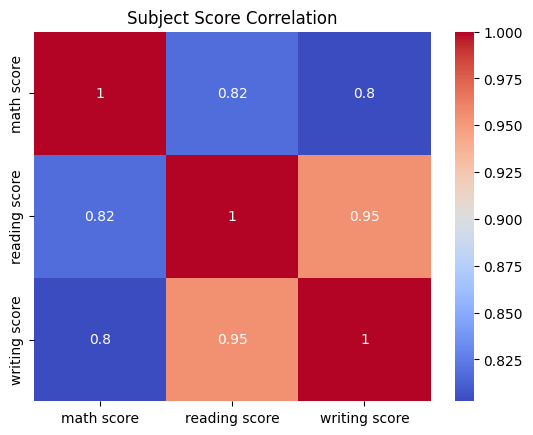

In [35]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Subject Score Correlation")
plt.show()


In [36]:
top_5 = students_data[students_data['total_score'] >= students_data['total_score'].quantile(0.95)]

# Analyze demographics
top_5['gender'].value_counts()
top_5['race/ethnicity'].value_counts()
top_5['parental level of education'].value_counts()
top_5['lunch'].value_counts()

,count
lunch,
standard,46
free/reduced,4


In [38]:
students_data['average_score'] = students_data['total_score'] / 3


In [39]:
students_data['performance_category'] = pd.cut(
    students_data['average_score'],
    bins=[0, 60, 80, 100],
    labels=['Low', 'Medium', 'High']
)

students_data['performance_category'].value_counts()

,count
performance_category,
Medium,513
Low,293
High,194


In [40]:
students_data.to_csv("student_performance_cleaned.csv", index=False)